In [3]:
#!pip install yfinance

In [1]:
import eikon as ek  # the Eikon Python wrapper package
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from scipy.stats import norm
import requests
from io import StringIO
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

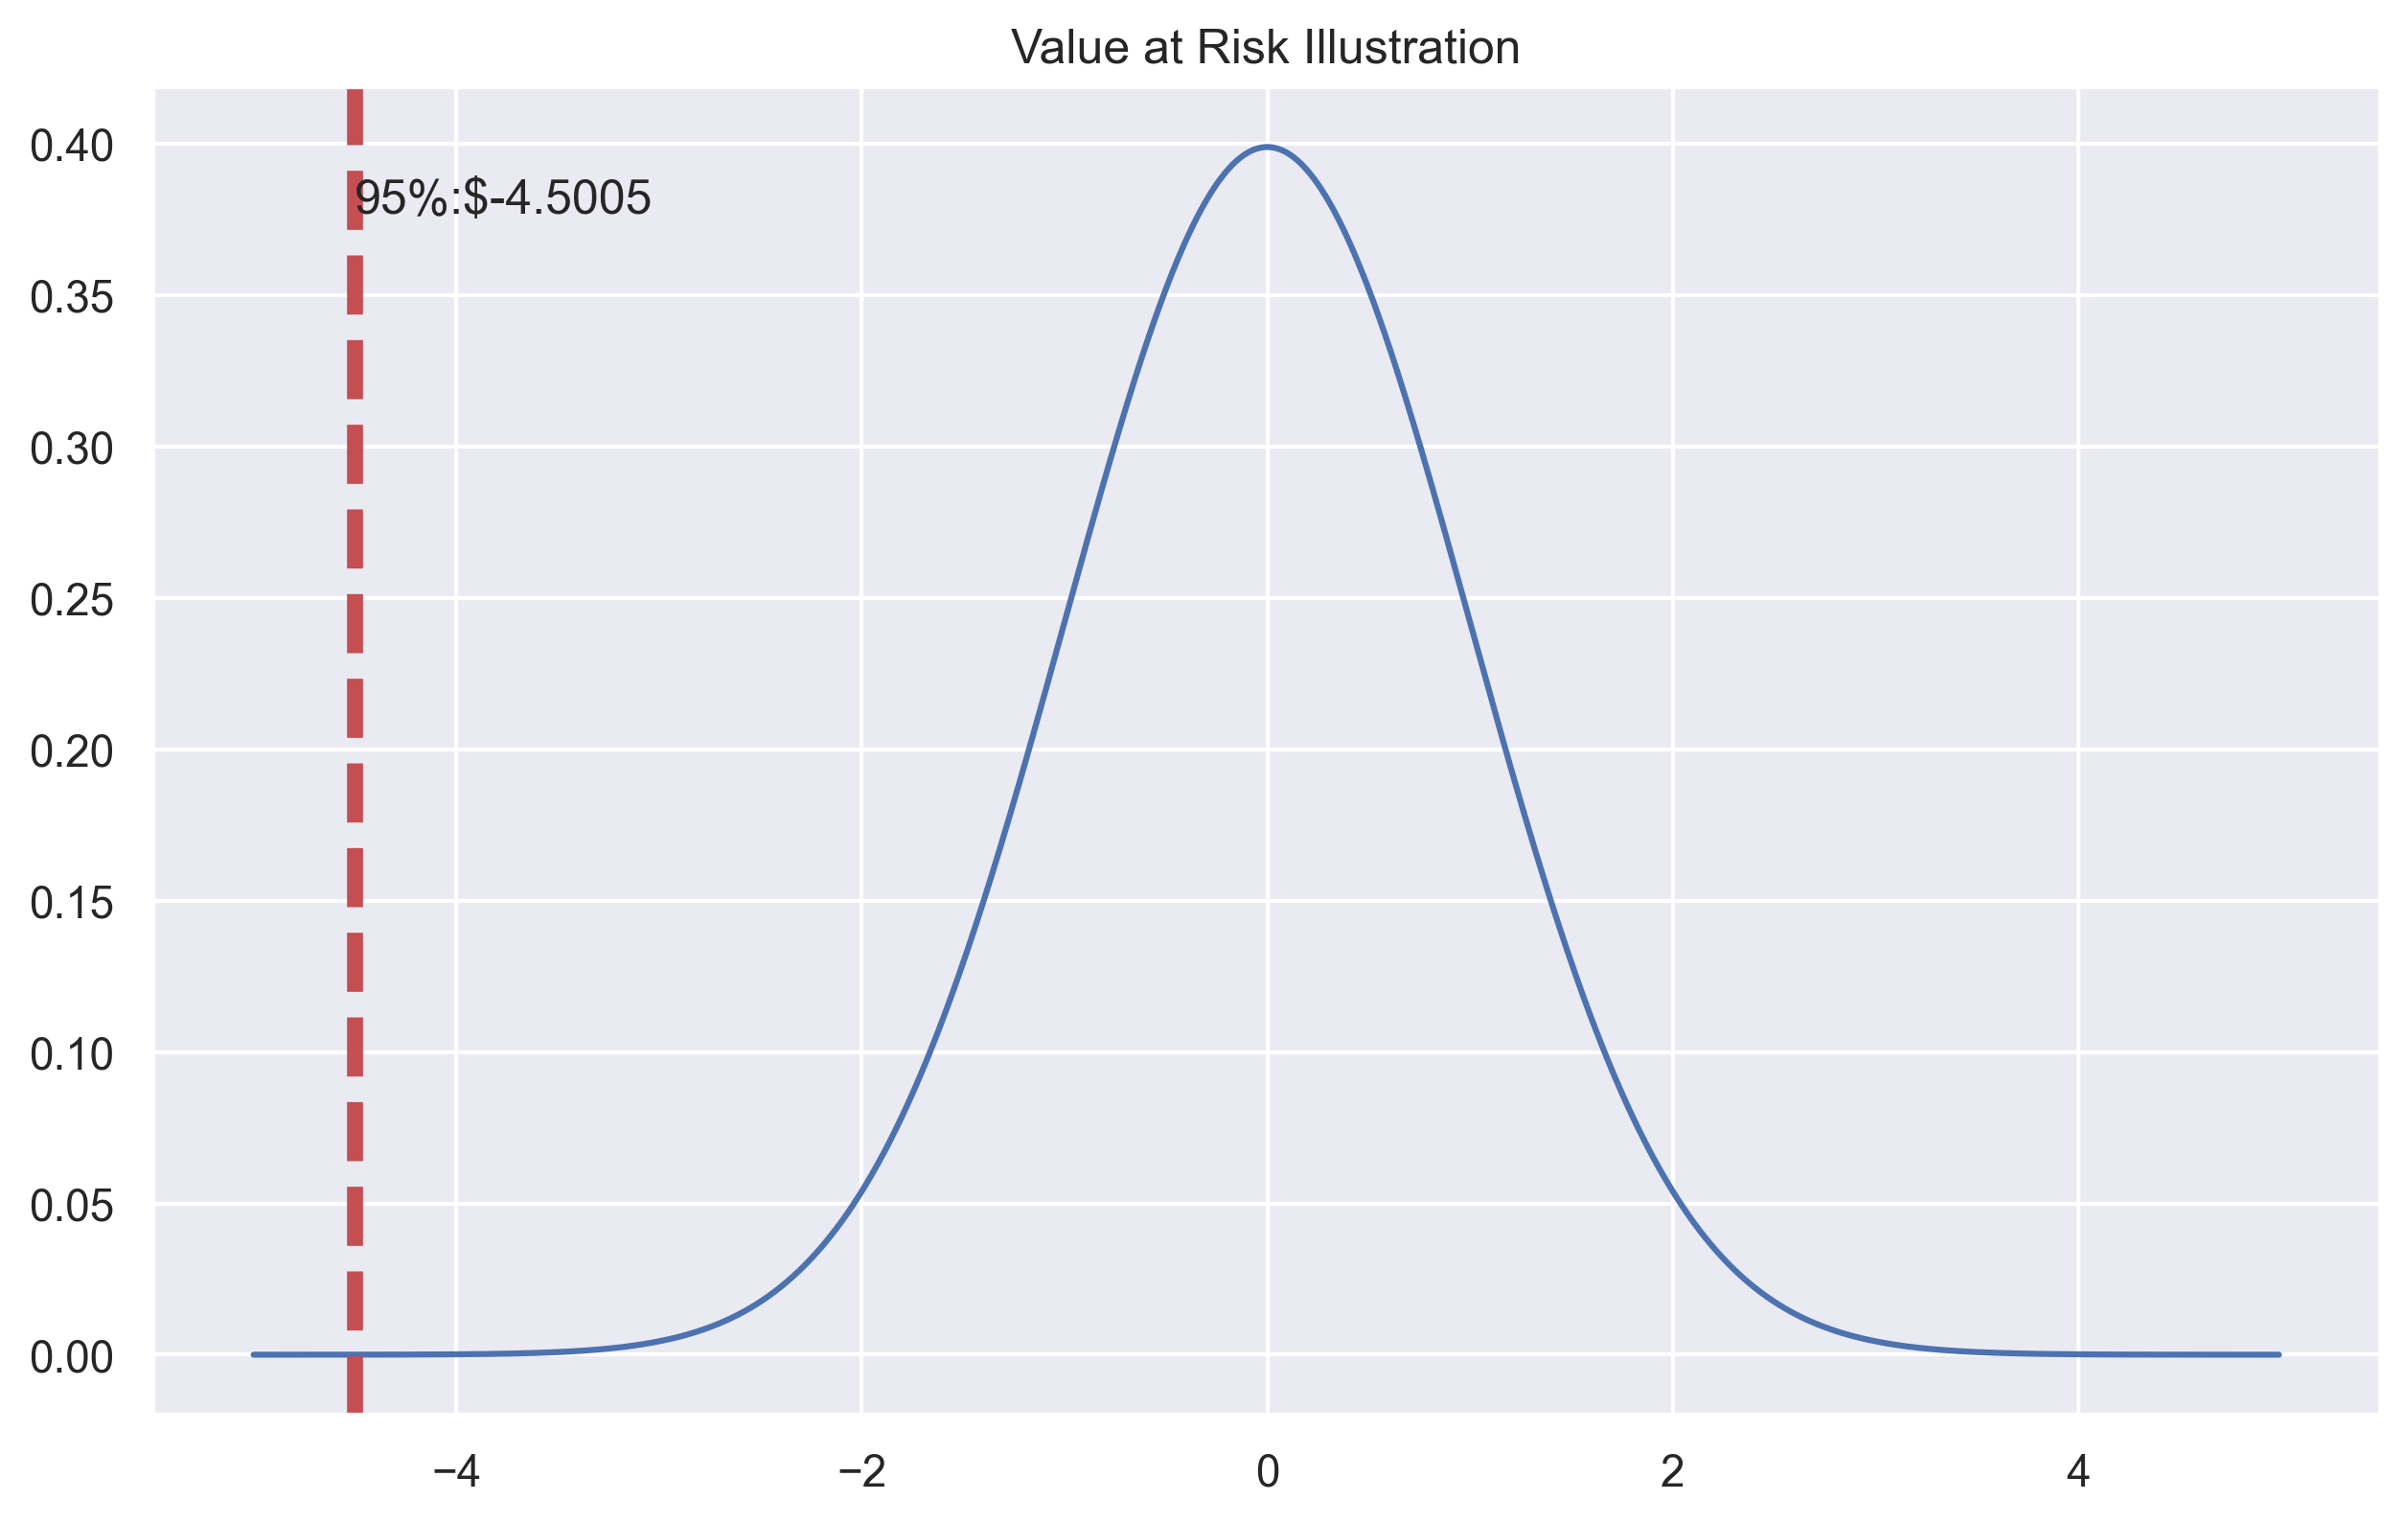

In [4]:
mean = 0
std_dev = 1
x = np.arange(-5, 5, 0.01)
y = norm.pdf(x, mean, std_dev)
pdf = plt.plot(x, y)
min_ylim, max_ylim = plt.ylim()
plt.text(np.percentile(x, 5), max_ylim * 0.9, '95%:${:.4f}'
         .format(np.percentile(x, 5)))
plt.axvline(np.percentile(x, 5), color='r', linestyle='dashed',
            linewidth=4)
plt.title('Value at Risk Illustration')
plt.show()

In [5]:
from datetime import datetime, timedelta
today = datetime.today()
past = today - timedelta(days=(365))
print(today, past)
stocks = ek.get_timeseries(["IBM", "MSFT.O", "NVDA.O"], start_date = past, end_date = today, fields='CLOSE', interval="daily")
stocks

2023-04-13 16:26:34.689056 2022-04-13 16:26:34.689056


CLOSE,IBM,MSFT.O,NVDA.O
Date,,,
2022-04-14,126.56,279.83,212.58
2022-04-18,126.17,280.52,217.83
2022-04-19,129.15,285.3,221.98
2022-04-20,138.32,286.36,214.82
2022-04-21,139.85,280.81,201.83
...,...,...,...
2023-04-06,130.5,291.6,270.37
2023-04-10,131.03,289.39,275.79
2023-04-11,130.42,282.83,271.69


In [6]:
def getDailyData(symbol):
        parameters = {'function': 'TIME_SERIES_DAILY_ADJUSTED', 
                      'symbol': symbol,
                       'outputsize':'full',
                       'datatype': 'csv', 
                       'apikey': 'insert your api key here'}

        response = requests.get('https://www.alphavantage.co/query',
                                params=parameters)

        csvText = StringIO(response.text)
        data = pd.read_csv(csvText, index_col='timestamp')
        return data

In [7]:
symbols = ["IBM", "MSFT", "INTC"]
stock3 = []
for symbol in symbols:
    stock3.append(getDailyData(symbol)[::-1]['close']
                  ['2020-01-01': '2020-12-31'])
stocks = pd.DataFrame(stock3).T
stocks.columns = symbols

In [8]:
stocks.head()

,IBM,MSFT,INTC
timestamp,,,
2020-01-02,135.42,160.62,60.84
2020-01-03,134.34,158.62,60.10
2020-01-06,134.10,159.03,59.93
2020-01-07,134.19,157.58,58.93
2020-01-08,135.31,160.09,58.97


## Variance-Covariance Method

In [10]:
stocks_returns = (np.log(stocks) - np.log(stocks.shift(1))).dropna()
stocks_returns

,IBM,MSFT,INTC
timestamp,,,
2020-01-03,-0.008007,-0.012530,-0.012238
2020-01-06,-0.001788,0.002581,-0.002833
2020-01-07,0.000671,-0.009160,-0.016827
2020-01-08,0.008312,0.015803,0.000679
2020-01-09,0.010513,0.012416,0.005580
...,...,...,...
2020-12-24,0.006356,0.007797,0.010679
2020-12-28,0.001042,0.009873,0.000000
2020-12-29,-0.008205,-0.003607,0.048112


In [11]:
stocks_returns_mean = stocks_returns.mean()
weights  = np.random.random(len(stocks_returns.columns))
weights /= np.sum(weights)
cov_var = stocks_returns.cov()
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

In [13]:
posiciones = ([12000, 1500, 300, 600, 234])
precios = [12.3, 324, 243,23 ]
valor_total = precios * posiciones = [144123, 5423]
valor_portafolios = sum(valor_total)
weights = array([0.15892504, 0.19353163, 0.64754333])

TypeError: can't multiply sequence by non-int of type 'list'

In [17]:
stocks_returns_mean

CLOSE
IBM       0.000006
MSFT.O    0.000850
NVDA.O    0.002662
dtype: float64

In [13]:
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

In [14]:
port_std

0.015829238726839057

In [38]:
1e6

1000000.0

In [24]:
initial_investment = 1e6
conf_level = 0.95

In [18]:
alpha = norm.ppf(.05, stocks_returns_mean, port_std)

In [19]:
alpha

array([-0.03697179, -0.03612736, -0.03431526])

In [20]:
stocks.columns

Index(['IBM', 'MSFT.O', 'NVDA.O'], dtype='object', name='CLOSE')

In [21]:
len(stocks.columns)

3

In [25]:
for i, j in zip(stocks.columns, range(len(stocks.columns))):
    VaR_param = (initial_investment - initial_investment * 
                     (1 + alpha))[j]
    print("Parametric VaR result for {} is {} "
              .format(i, VaR_param))

Parametric VaR result for IBM is 36971.78968786006 
Parametric VaR result for MSFT.O is 36127.36209453305 
Parametric VaR result for NVDA.O is 34315.2589564767 


In [ ]:
for i, j in zip(stocks.columns, range(len(stocks.columns))):
        VaR_param = (initial_investment - initial_investment * 
                     (1 + alpha))[j]
        print("Parametric VaR result for {} is {} "
              .format(i, VaR_param))

In [27]:
def VaR_parametric(initial_investment, conf_level):
    alpha = norm.ppf(1 - conf_level, stocks_returns_mean, port_std)
    for i, j in zip(stocks.columns, range(len(stocks.columns))):
        VaR_param = (initial_investment - initial_investment * 
                     (1 + alpha))[j]
        print("Parametric VaR result for {} is {} "
              .format(i, VaR_param))
    VaR_param = (initial_investment - initial_investment * (1 + alpha))
    print('--' * 25)
    return VaR_param

In [28]:
VaR_param = VaR_parametric(initial_investment, conf_level)
VaR_param

Parametric VaR result for IBM is 36971.78968786006 
Parametric VaR result for MSFT.O is 36127.36209453305 
Parametric VaR result for NVDA.O is 34315.2589564767 
--------------------------------------------------


array([36971.78968786, 36127.36209453, 34315.25895648])

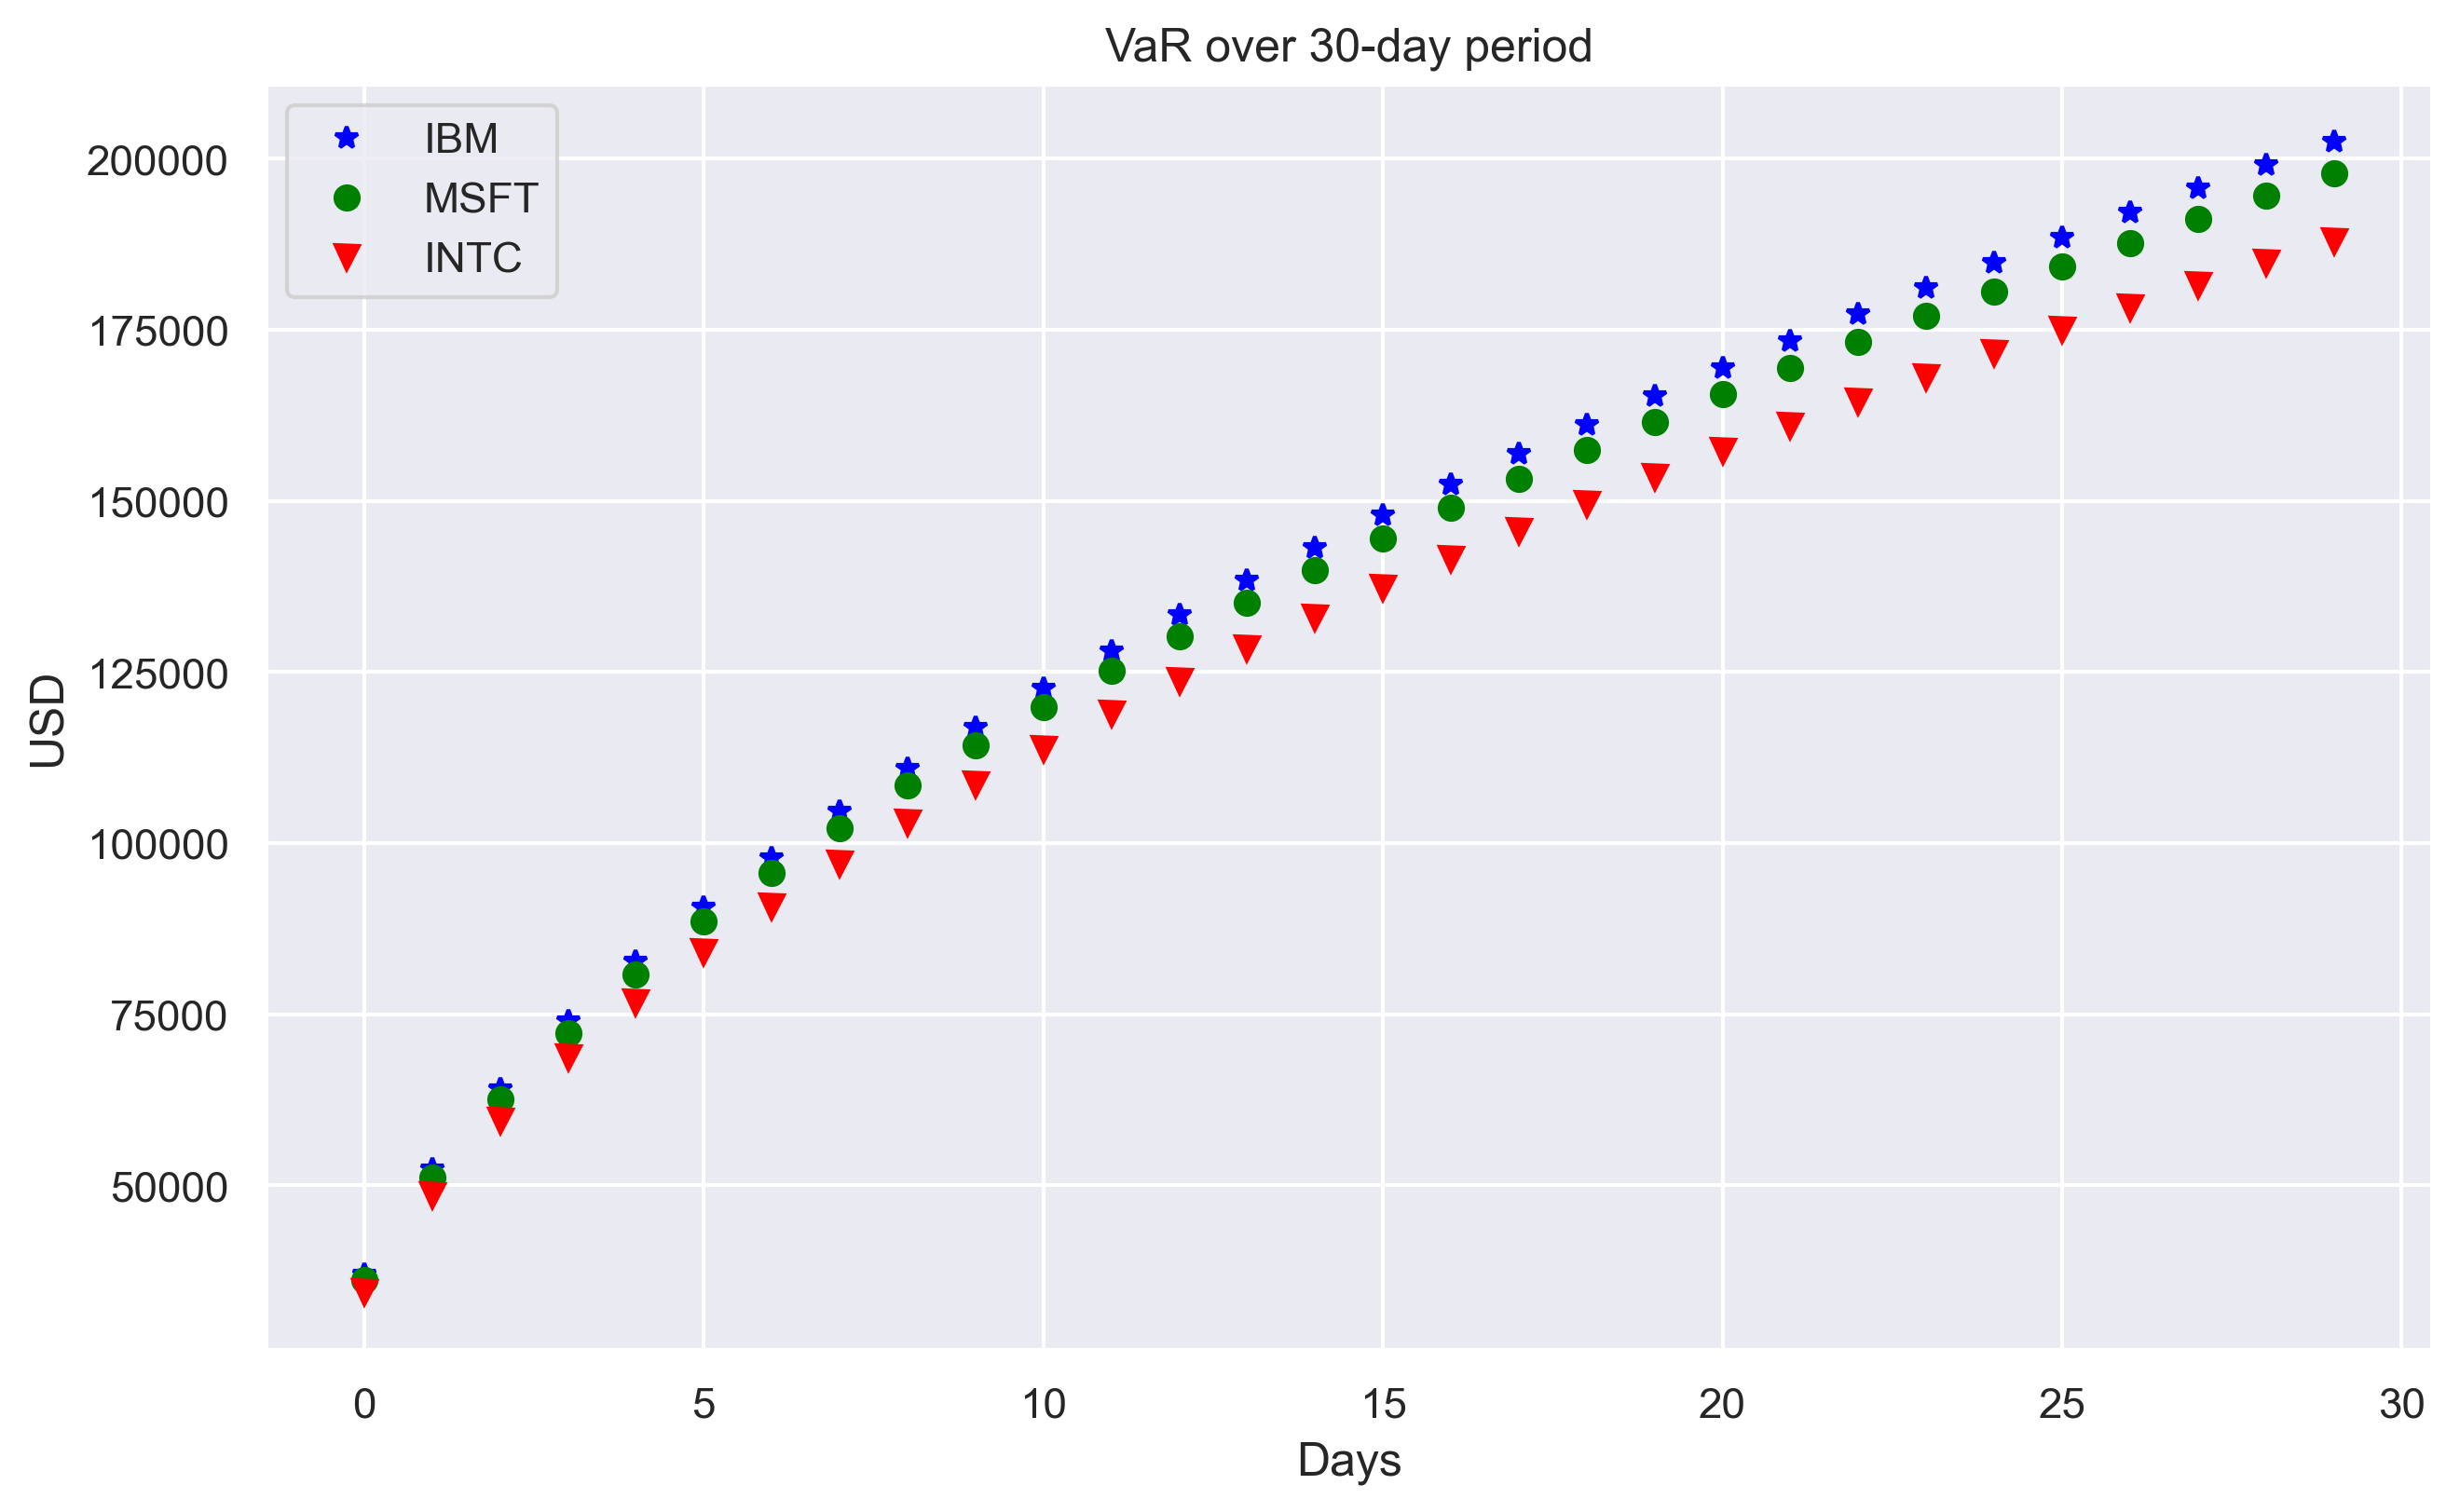

In [30]:
var_horizon = []
time_horizon = 30
for j in range(len(stocks_returns.columns)):
    for i in range(1, time_horizon + 1):
        var_horizon.append(VaR_param[j] * np.sqrt(i))
plt.plot(var_horizon[:time_horizon], "o",
         c='blue', marker='*', label='IBM')
plt.plot(var_horizon[time_horizon:time_horizon + 30], "o",
         c='green', marker='o', label='MSFT')
plt.plot(var_horizon[time_horizon + 30:time_horizon + 60], "o",
         c='red', marker='v', label='INTC')
plt.xlabel("Days")
plt.ylabel("USD")
plt.title("VaR over 30-day period")
plt.legend()
plt.show()

## Historical Simulation VaR

In [31]:
for i, j in zip(stocks_returns.columns,
                    range(len(stocks_returns.columns))):
    print(np.percentile(stocks_returns.loc[:, i], 5))

IBM 0
MSFT.O 1
NVDA.O 2


In [37]:
stocks_returns.loc[:, 'IBM']

Date
2021-04-06    -0.01266
2021-04-07    0.005276
2021-04-08    0.001407
2021-04-09    0.004504
2021-04-12   -0.008434
                ...   
2022-03-25    0.016117
2022-03-28    0.000913
2022-03-29    0.003569
2022-03-30    0.001439
2022-03-31   -0.016098
Name: IBM, Length: 251, dtype: Float64

In [34]:
np.percentile(stocks_returns.loc[:, 'IBM'], 5)

-0.016838322775881043

In [35]:
def VaR_historical(initial_investment, conf_level):
    Hist_percentile95 = []
    for i, j in zip(stocks_returns.columns,
                    range(len(stocks_returns.columns))):
        Hist_percentile95.append(np.percentile(stocks_returns.loc[:, i],
                                               5))
        print("Based on historical values 95% of {}'s return is {:.4f}"
              .format(i, Hist_percentile95[j]))
        VaR_historical = (initial_investment - initial_investment *
                          (1 + Hist_percentile95[j]))
        print("Historical VaR result for {} is {:.2f} "
              .format(i, VaR_historical))
        print('--' * 35)

In [36]:
VaR_historical(initial_investment,conf_level)

Based on historical values 95% of IBM's return is -0.0168
Historical VaR result for IBM is 16838.32 
----------------------------------------------------------------------
Based on historical values 95% of MSFT.O's return is -0.0254
Historical VaR result for MSFT.O is 25445.73 
----------------------------------------------------------------------
Based on historical values 95% of NVDA.O's return is -0.0445
Historical VaR result for NVDA.O is 44471.38 
----------------------------------------------------------------------


## Monte Carlo VaR

In [39]:
x = np.random.uniform(-1, 1, 100) 
y = np.random.uniform(-1, 1, 100)

In [46]:
for i in range(100):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [47]:
sample = 100    
def pi_calc(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i] ** 2 + y[i] ** 2) <= 1:
            point_inside_circle += 1 
    print('pi value is {}'.format(4 * point_inside_circle/sample))

In [48]:
pi_calc(x,y)

pi value is 3.24


In [49]:
x = np.random.uniform(-1, 1, 1000000)
y = np.random.uniform(-1, 1, 1000000)

In [50]:
sample = 1000000   

def pi_calc(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i] ** 2 + y[i] ** 2) < 1:
            point_inside_circle += 1 
    print('pi value is {:.2f}'.format(4 * point_inside_circle/sample))

In [51]:
pi_calc(x,y)

pi value is 3.14


In [52]:
len(stocks.columns)

3

In [53]:
sim_data = pd.DataFrame([])
num_reps = 1000
n = 100
for i in range(len(stocks.columns)):
    print(i)

0
1
2


In [54]:
sim_data = pd.DataFrame([])
num_reps = 1000
n = 100
for i in range(len(stocks.columns)):
    mean = np.random.randn(n).mean()
    std = np.random.randn(n).std()
    temp = pd.DataFrame(np.random.normal(mean, std, num_reps))
    sim_data = pd.concat([sim_data, temp], axis=1)
sim_data.columns = ['Simulation 1', 'Simulation 2', 'Simulation 3']

In [55]:
sim_data

,Simulation 1,Simulation 2,Simulation 3
0,-1.302824,1.545166,-0.718538
1,-0.497329,1.688181,1.411093
2,0.171804,-0.895629,0.642735
3,-0.490972,-1.097831,-1.384509
4,-1.936529,-0.481804,0.544859
...,...,...,...
995,-0.780963,-0.575313,1.326982
996,0.788011,-0.759150,0.896094
997,0.808152,-0.988983,-0.268383
998,-0.519048,1.657548,-1.179021


In [56]:
MC_percentile95 = []
for i, j in zip(sim_data.columns, range(len(sim_data.columns))):
    print(i,j)

Simulation 1 0
Simulation 2 1
Simulation 3 2


In [28]:
def MC_VaR(initial_investment, conf_level):
    MC_percentile95 = []
    for i, j in zip(sim_data.columns, range(len(sim_data.columns))):
        MC_percentile95.append(np.percentile(sim_data.loc[:, i], 5))
        print("Based on simulation 95% of {}'s return is {:.4f}"
              .format(i, MC_percentile95[j]))
        VaR_MC = (initial_investment - initial_investment * 
                  (1 + MC_percentile95[j]))
        print("Simulation VaR result for {} is {:.2f} "
              .format(i, VaR_MC))
        print('--' * 35)

In [29]:
MC_VaR(initial_investment, conf_level)

Based on simulation 95% of Simulation 1's return is -1.3032
Simulation VaR result for Simulation 1 is 1303220.95 
----------------------------------------------------------------------
Based on simulation 95% of Simulation 2's return is -1.5999
Simulation VaR result for Simulation 2 is 1599923.81 
----------------------------------------------------------------------
Based on simulation 95% of Simulation 3's return is -1.7083
Simulation VaR result for Simulation 3 is 1708342.41 
----------------------------------------------------------------------
